# Assignment - Foundation of Machine Learning

### Based on the content covered today's class, you are tasked to the following:

1- Code from scratch the k-means clustering algorithm.

2- Visualize the different centroids and clusters.

3- Code from scratch the PCA algorithm.

4- Visualize the result of PCA for 2 components.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [ ]:
path = "/content/drive/MyDrive/Assignment/Data.csv"
df = pd.read_csv(path, sep=',')

In [ ]:
df.head()

,f1,f2,f3,f4
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
print(f"df shape : {df.shape}")

df shape : (150, 4)


In [ ]:
# check nan values in the data
for col in df.columns:
  if df[col].isna().sum() != 0:
    print(f"column {col} as number of nan equal to {df[col].isna().sum()}")

In [ ]:
# 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      150 non-null    float64
 1   f2      150 non-null    float64
 2   f3      150 non-null    float64
 3   f4      150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [ ]:
df.describe()

,f1,f2,f3,f4
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.corr()

,f1,f2,f3,f4
f1,1.000000,-0.117570,0.871754,0.817941
f2,-0.117570,1.000000,-0.428440,-0.366126
f3,0.871754,-0.428440,1.000000,0.962865
f4,0.817941,-0.366126,0.962865,1.000000


We can see that correlation between **f3** and **f4** is most important than correlation between **f1** and **f4**.

In [ ]:
df.cov()

,f1,f2,f3,f4
f1,0.685694,-0.042434,1.274315,0.516271
f2,-0.042434,0.189979,-0.329656,-0.121639
f3,1.274315,-0.329656,3.116278,1.295609
f4,0.516271,-0.121639,1.295609,0.581006


We can see again that linear relationship between **f3** and **f4** is most important than linear relationship between **f1** and **f4**.

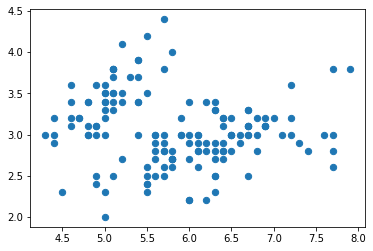

In [ ]:
df = np.array(df)
plt.scatter(df[:, 0], df[:, 1], s=40, cmap=plt.cm.Spectral)
plt.show()

### 1- Code from scratch the k-means clustering algorithm.

In [ ]:
class KMeansClustering:
    def __init__(self, k=4, tol=0.001, max_iter=1000):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter
        # tol := how much the centroids going to move.
        # tol allow us to say we're optimized if the centroid is not moving more than the tolerance value.

    def fit(self,data):

        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in data:
                distances = [np.linalg.norm(featureset - self.centroids[centroid]) for centroid in self.centroids]
                classification = np.argmin(distances) # or classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification], axis=0)

            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum(((current_centroid - original_centroid)/original_centroid)*100) > self.tol:
                    #print(np.sum(((current_centroid-original_centroid)/original_centroid)*100.0))
                    optimized = False

            if optimized:
                break

    def predict(self,data):
        distances = [np.linalg.norm(data - self.centroids[centroid]) for centroid in self.centroids]
        classification =  np.argmin(distances)
        
        return classification

###2- Visualize the different centroids and clusters.

The index of the minimum distance is : 3


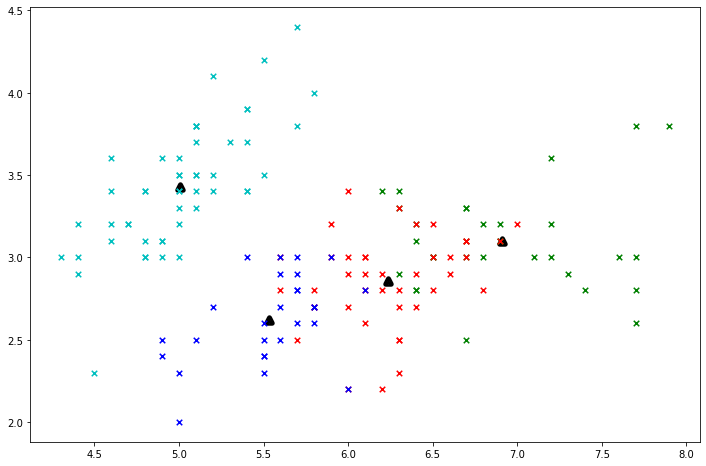

In [ ]:
### Test class := Visualization ####

colors = ["g","r","c","b","k"]

model_clf = KMeansClustering()
model_clf.fit(df)
classification = model_clf.predict(df)

print(f"The index of the minimum distance is : {classification}")

plt.figure(figsize=(12,8))

for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1], marker="^", color="k", s=30, linewidths=5)

for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=30, linewidths=5)

plt.show()

### 3- Code from scratch the PCA algorithm.


In [ ]:
class PCA:
  
  def __init__(self, n_components):
    self.n_components = n_components
    #self.components = None
    self.mean = None

  def fit(self, X):
    # copying X because can be a float type
    X = X.astype(float)

    # normalized data
    self.mean = np.mean(X, axis=0)
    stds = X.std()
    X_centered = X - self.mean
    X_normalized = X_centered/stds


    # covariance, function needs samples as columns
    covariance = X_normalized.T.dot(X_normalized)  # or covariance = np.cov(X_centered.T)

    # eigendecomposition
    eigenvalues, eigenvectors = np.linalg.eig(covariance)

    # eigenvector v = [:,i] column vector, transpose for easier calculations
    # sort eigenvectors
    ##eigenvectors = eigenvectors.T
    indx = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[indx]
    sorted_eigenvectors = eigenvectors[:,indx]

    # select a subset from the rearranged eigenvalue matrix as per our need
    ##self.components = eigenvectors[0:self.n_components]
    self.eigenvectors_subset = sorted_eigenvectors[:, 0:self.n_components]
    return X_centered, sorted_eigenvalues, sorted_eigenvectors, self.eigenvectors_subset
    

  def projection_data(self, X):
    # project data
    X = X - self.mean
    stds = X.std()
    X_centered = X - self.mean
    X_normalized = X_centered/stds
    return np.dot(self.eigenvectors_subset.T, X_normalized.T).T

### 4- Visualize the result of PCA for 2 components.

Shape of X : (150, 4)
------------------------------------------------
Shape of transformed X : (150, 2)
------------------------------------------------
Eigenvalues are : [161.70402757   9.2806514    2.99102843   0.91154451]
------------------------------------------------
Eigenvectors are : [[ 0.36138659 -0.65658877 -0.58202985  0.31548719]
 [-0.08452251 -0.73016143  0.59791083 -0.3197231 ]
 [ 0.85667061  0.17337266  0.07623608 -0.47983899]
 [ 0.3582892   0.07548102  0.54583143  0.75365743]]
------------------------------------------------
The eigenvectors selected are : [[ 0.36138659 -0.65658877]
 [-0.08452251 -0.73016143]
 [ 0.85667061  0.17337266]
 [ 0.3582892   0.07548102]]
------------------------------------------------
X projected is : [[-7.68213095  4.69904589]
 [-7.71029776  5.16486185]
 [-7.87437441  5.13478473]
 [-7.73957666  5.29745442]
 [-7.72397467  4.6921419 ]]


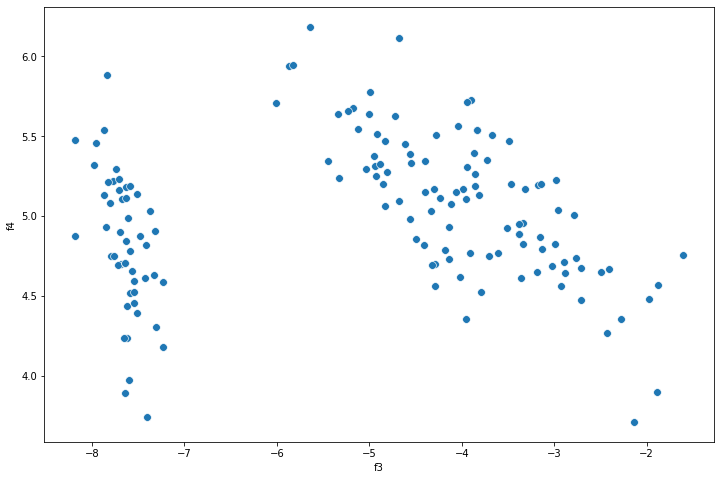

In [ ]:
### Test class := Visualization ####

model_pca = PCA(2)
X_centered, sorted_eigenvalues, sorted_eigenvectors, eigenvectors_sorted = model_pca.fit(df)
X_projected = model_pca.projection_data(df)

# Creating a Pandas DataFrame of reduced Dataset
df_selected = pd.DataFrame(X_projected , columns = ['f3','f4'])
 
# Concat it with target variable to create a complete Dataset
##principal_df = pd.concat([principal_df , pd.DataFrame(target)] , axis = 1)

print(f"Shape of X : {df.shape}")
print("------------------------------------------------")
print(f"Shape of transformed X : {X_projected.shape}")
print("------------------------------------------------")
print(f"Eigenvalues are : {sorted_eigenvalues}")
print("------------------------------------------------")
print(f"Eigenvectors are : {sorted_eigenvectors}")
print("------------------------------------------------")
print(f"The eigenvectors selected are : {eigenvectors_sorted}")
print("------------------------------------------------")
print(f"X projected is : {X_projected[:5] }")

# x1 = X_projected[:, 0]
# x2 = X_projected[:, 1]
# plt.scatter(x1, x2, alpha=0.8)

# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.colorbar()
# plt.show()
plt.figure(figsize=(12,8))
sb.scatterplot(data = df_selected , x = 'f3',y = 'f4',  s = 60 , palette= 'icefire')